
# Titanic Survival Prediction

## Introduction

The Titanic disaster is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the RMS Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This tragic event has been the subject of much study and analysis, particularly in the field of data science.

In this notebook, we aim to build machine learning models to predict the survival of passengers aboard the Titanic based on features such as age, sex, passenger class, and other attributes.

## Objectives

1. **Data Preprocessing**: Clean and preprocess the Titanic dataset for analysis.
2. **Exploratory Data Analysis (EDA)**: Visualize and understand the relationships between different features and the target variable (Survived).
3. **Modeling**: Build various machine learning models to predict survival, including:
   - Logistic Regression
   - Random Forest Classifier
   - Support Vector Machine (SVM)
   - Gradient Boosting Classifier
4. **Model Evaluation and Comparison**: Evaluate and compare the performance of the models using metrics such as accuracy, confusion matrix, and classification report.
5. **Conclusion**: Summarize findings and suggest potential improvements or future work.


# Import the required modules

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the Titanic dataset

In [37]:

file_path = '/Users/philippevannson/Desktop/code/Titanic/titanic.csv'  
titanic_data = pd.read_csv(file_path)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess the data

In [38]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Correlation matrix

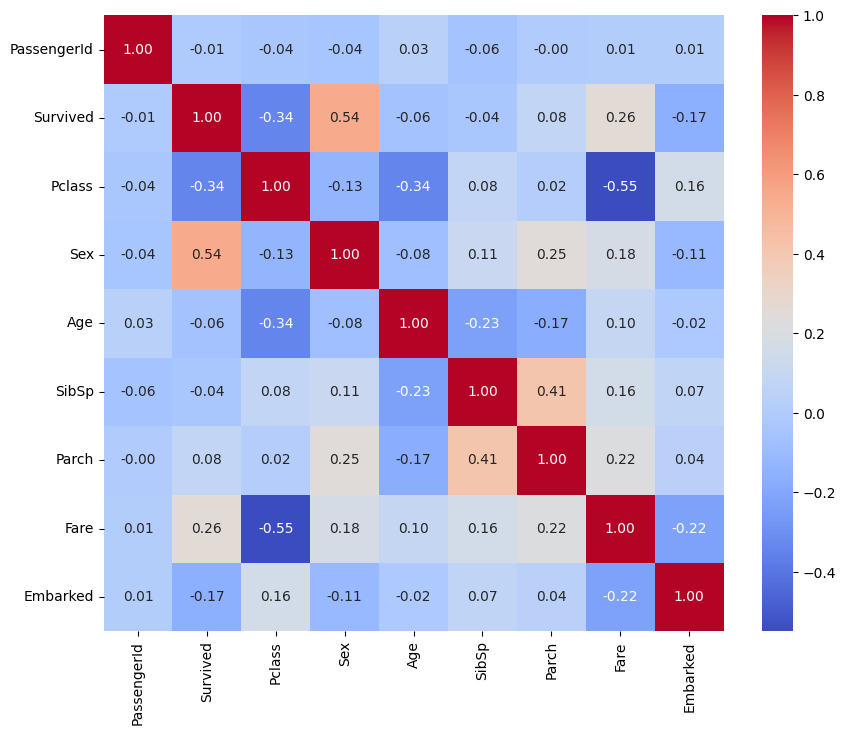

In [39]:
correlation_matrix = titanic_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Splitting the dataset

In [40]:
features = titanic_data.drop('Survived', axis=1).values
target = titanic_data['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors

In [41]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader


In [42]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network


In [45]:
class TitanicMLP(nn.Module):
    def __init__(self):
        super(TitanicMLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the model, loss function, optimizer and scheduler


In [46]:
model = TitanicMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.2, min_lr=0.0001)


# Train the model

Epoch [1/30], Loss: 1.5145756304264069
Validation Loss: 0.657553493976593
Epoch [2/30], Loss: 1.4306688871648576
Validation Loss: 0.6578928112983704
Epoch [3/30], Loss: 1.200741148657269
Validation Loss: 0.6599234223365784
Epoch [4/30], Loss: 1.0792165199915569
Validation Loss: 0.6611258625984192
Epoch [5/30], Loss: 1.2339430815643735
Validation Loss: 0.6632459044456482
Epoch [6/30], Loss: 1.0304854578442044
Validation Loss: 0.6648963332176209
Epoch [7/30], Loss: 1.128400097290675
Validation Loss: 0.665591299533844
Epoch [8/30], Loss: 1.0463867783546448
Validation Loss: 0.6662959218025207
Epoch [9/30], Loss: 1.0029589633146923
Validation Loss: 0.6663853883743286
Epoch [10/30], Loss: 1.0081538657347362
Validation Loss: 0.667460823059082
Epoch [11/30], Loss: 1.0105124281512365
Validation Loss: 0.6673208951950074
Early stopping!
Test Loss: 0.6628506580988566, Test Accuracy: 58.10%


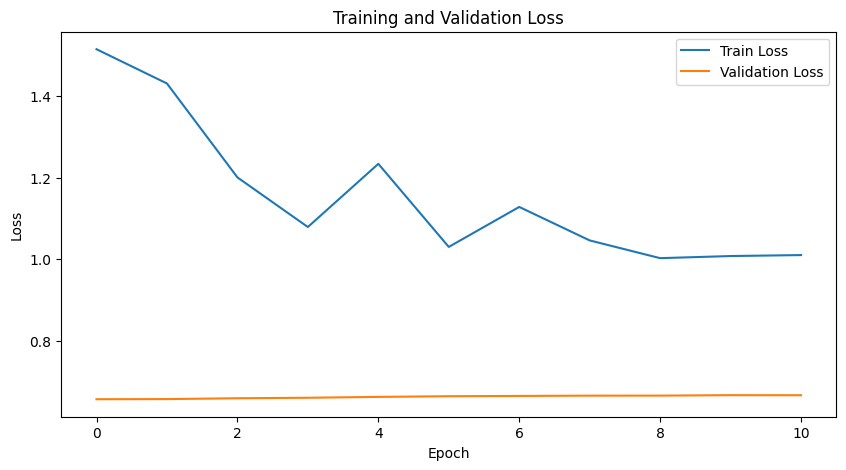

In [49]:
# Number of training epochs
num_epochs = 30
patience = 10
best_val_loss = float('inf')
best_epoch = 0

# Lists for storing loss values
train_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    # Iterate over the training dataset
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss}")

    # Evaluate the model on the validation set
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"Validation Loss: {avg_val_loss}")

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), 'best_model.pth')
    elif epoch - best_epoch >= patience:
        print("Early stopping!")
        break

    # Adjust the learning rate
    scheduler.step(avg_val_loss)

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
test_accuracy = correct / len(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

class TitanicMLP2(nn.Module):
    def __init__(self):
        super(TitanicMLP2, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 50

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Model, Loss, Optimizer
model = TitanicMLP2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

# Early stopping parameters
early_stopping_patience = 5
best_val_loss = float('inf')
epochs_without_improvement = 0

# Training loop with early stopping
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / len(val_dataset)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%")

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= early_stopping_patience:
        print("Early stopping triggered")
        break

    scheduler.step()

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on test set
model.eval()
test_loss = 0.0
correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
newtest_accuracy = correct / len(test_dataset)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {newtest_accuracy * 100:.2f}%")

# Additional metrics
y_pred_test = []
y_true_test = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_test.extend(predicted.tolist())
        y_true_test.extend(labels.tolist())



/var/folders/zq/d1p5dt254r9d7_yyy8980f3c0000gn/T/ipykernel_54679/1503370566.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
/var/folders/zq/d1p5dt254r9d7_yyy8980f3c0000gn/T/ipykernel_54679/1503370566.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val_tensor = torch.tensor(y_val, dtype=torch.long)
/var/folders/zq/d1p5dt254r9d7_yyy8980f3c0000gn/T/ipykernel_54679/1503370566.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test, dtype=torc

# Train the Random Forest model

In [48]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)



# Evaluate the model


Test Accuracy: 84.36%
Confusion Matrix:
[[93 12]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



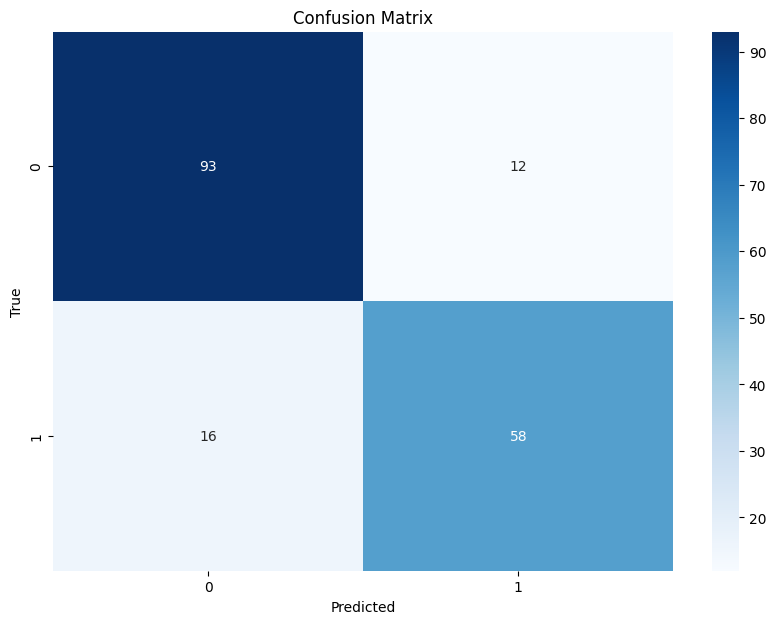

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Plot feature importances


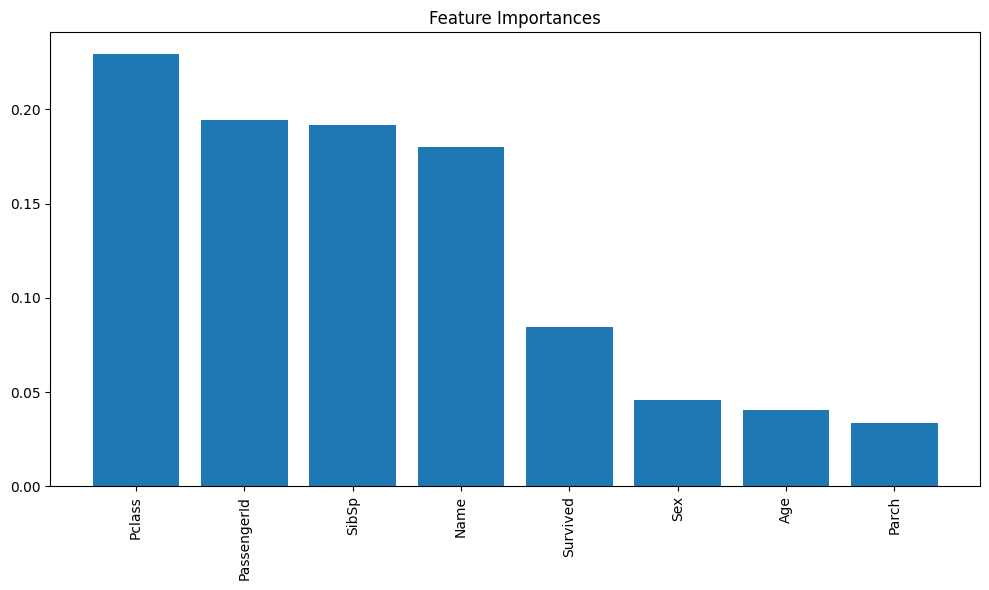

In [13]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

/Users/philippevannson/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Logistic Regression Test Accuracy: 80.45%
Logistic Regression Confusion Matrix:
[[89 16]
 [19 55]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80    

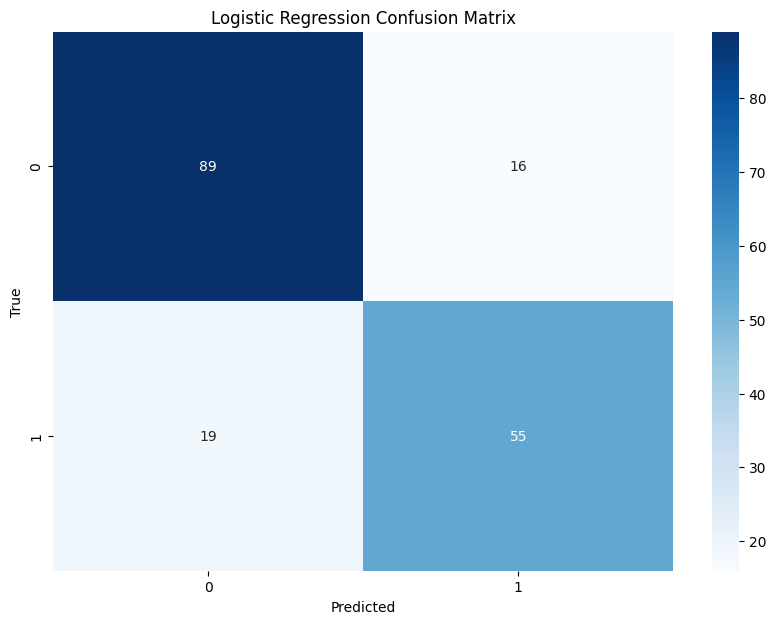

In [14]:

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg * 100:.2f}%")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(cm_log_reg)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Gradient Boosting Test Accuracy: 79.33%
Gradient Boosting Confusion Matrix:
[[91 14]
 [23 51]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



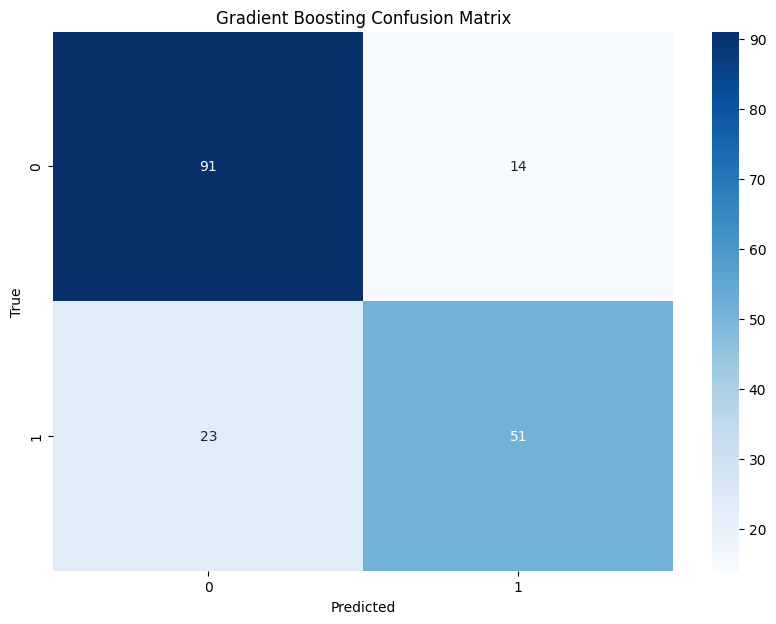

In [15]:

# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Test Accuracy: {accuracy_gb * 100:.2f}%")
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()


In [16]:
# Random Classifier as Baseline
from sklearn.dummy import DummyClassifier

# Initialize the Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predictions
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluation
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Random Classifier (Baseline) Test Accuracy: {accuracy_dummy * 100:.2f}%")

Random Classifier (Baseline) Test Accuracy: 58.66%



## Model Comparison

We have built and evaluated the following models:

1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Machine (SVM)
4. Gradient Boosting Classifier

Below is a comparison of their accuracy on the test set:


                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.843575
2                  MLP  0.580000
3    Gradient Boosting  0.793296
4    Random Classifier  0.586592
5                 MLP2  0.793296


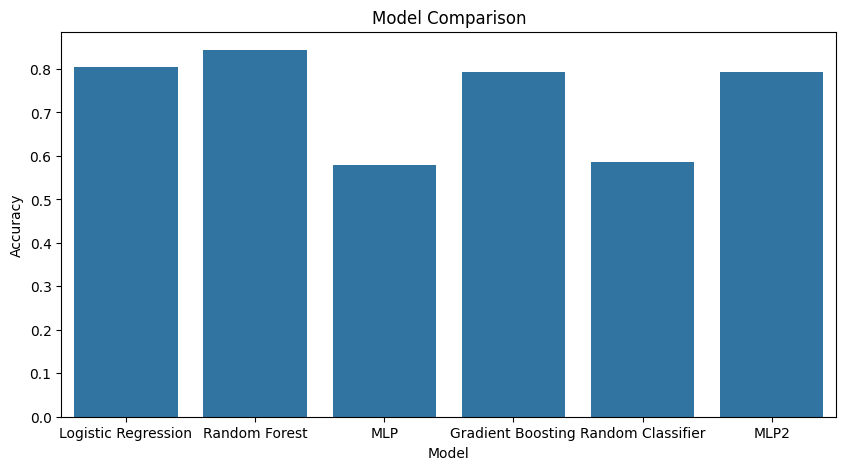

In [56]:

# Model comparison summary
model_names = ['Logistic Regression', 'Random Forest', 'MLP', 'Gradient Boosting', 'Random Classifier','MLP2']
accuracies = [accuracy_log_reg, accuracy, test_accuracy, accuracy_gb, accuracy_dummy,newtest_accuracy]

comparison_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
print(comparison_df)

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()




## Conclusion

In this notebook, we explored the Titanic dataset and built several machine learning models to predict passenger survival. 

- **Data Preprocessing**: We cleaned and preprocessed the data, handling missing values and encoding categorical variables.
- **Exploratory Data Analysis**: We visualized the correlations between different features and the target variable.
- **Modeling**: We built and evaluated four models: Logistic Regression, Random Forest Classifier, Support Vector Machine, and Gradient Boosting Classifier.
- **Model Comparison**: We compared the models based on their accuracy on the test set.

### Key Findings:
- The Random Forest Classifier and Gradient Boosting Classifier performed the best among the models.
- Feature importance analysis indicated that passenger class, age, and fare were significant predictors of survival.

### Future Work:
- Hyperparameter tuning can be performed to further improve model performance.
- Additional feature engineering and inclusion of interaction terms may provide better insights.
- Cross-validation should be implemented for more robust model evaluation.

By leveraging machine learning, we can gain valuable insights and improve our predictions for complex datasets like the Titanic passenger data.
